### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [3]:
import numpy as np
np.random.seed(999)
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import random
from math import log, ceil
import scipy.stats as st
from scipy.stats import binom
from scipy.stats import nbinom
from scipy.stats import rv_discrete
from scipy.stats import moment
from IPython.display import clear_output

- n = the probability of assurance
- p = the probability of having a defectice product
- the answer is the equation 1 - P(none is defective) == (the probability we want) which is $ (1 - 0.97^x = 0.85) $     ==     $ (\frac{log(1-0.85)}{log(0.97)} )$

- result is an intiger hence we use the ciel function to round the number up in order to get the minimun number of products.

In [4]:
def percent_of_one_defective(n, p):
    return ceil((log(1-n)/log(1-p)))

print(f'The number of samples we should ask is at least {percent_of_one_defective(0.85, 0.03)}')

The number of samples we should ask is at least 63


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [5]:
## Using the funcion from previos question.

print(f'The number of samples we should ask is at least {percent_of_one_defective(0.95, 0.04)}')

The number of samples we should ask is at least 74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

- Now it is a bit problematic to compute 1 - [p(x=0) + p(x=1) + p(x=2)+ .... + p(x=5)] = 0.9 without having the number
of samples so we identified negative binomial distribution on the non-defectice products. 
We built a function using the nbinom.ppf function on the non-defectice products and then we add the number of defectice products we need.

In [6]:
res_1C1 = int(st.nbinom.ppf(q=0.9, n=5, p=0.1, loc=0) + 5)
print('1C1:')
print(f'The number of samples we should ask is at least {res_1C1}\n')

res_1C2 = int(st.nbinom.ppf(q=0.9, n=15, p=0.3, loc=0) +15)
print('1C2:')
print(f'The number of samples we should ask is at least {res_1C2}')

1C1:
The number of samples we should ask is at least 78

1C2:
The number of samples we should ask is at least 64


- Now, like we did in class with Zohar, we'll show that although the mean is the same, the variance of each result is difference. Then we'll try to visualize which one of the distributions will reach its number of defectives products 'faster': X1 or X2?

X1:
Mean:50.00, Var:450.00
X2:
Mean:50.00, Var:116.67


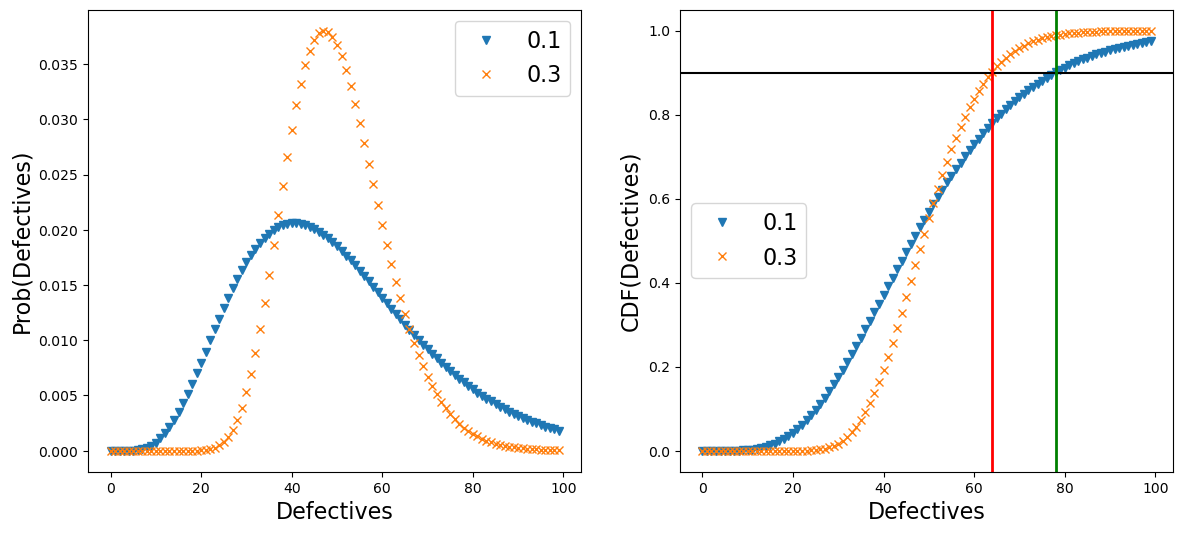

In [7]:
x1 = nbinom(5, 0.1, loc=5)
x2 = nbinom(15, 0.3, loc =15)

## i =  we do range(0, 40) 
i = range(0,int(round(2*5/0.1,0)))
p_x1 = x1.pmf([xx for xx in i])
p_x2 = x2.pmf([xx for xx in i])
cdf_x1 = x1.cdf([xx for xx in i])
cdf_x2 = x2.cdf([xx for xx in i])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(i, p_x1,'v',label='0.1')
plt.plot(i,p_x2,'x',label='0.3')
plt.xlabel("Defectives", fontsize = 16)
plt.ylabel("Prob(Defectives)", fontsize = 16)
plt.legend(fontsize=16);
plt.subplot(1,2,2)
plt.plot(i, cdf_x1,'v',label='0.1')
plt.plot(i,cdf_x2,'x',label='0.3')
plt.xlabel("Defectives", fontsize = 16)
plt.ylabel("CDF(Defectives)", fontsize = 16)
plt.axhline(y= 0.9, color='k')
plt.axvline(x= 64, linewidth=2, color='r')
plt.axvline(x= 78, linewidth=2, color='g')

plt.legend(fontsize=16);

print('X1:')
print('Mean:{:.2f}, Var:{:.2f}'.format(x1.mean(),x1.var()))
print('X2:')
print('Mean:{:.2f}, Var:{:.2f}'.format(x2.mean(),x2.var()))

In [8]:
upper_bound = []
for i in range(0, 80):
    sum=0
    for j in range(5, i):
        sum+=x1.pmf(j)*(1-x2.cdf(j-1))
    upper_bound.append(1-sum)
lower_bound = []
for i in range(0, 80):
    sum=0
    for j in range(15, i):
        sum += x2.pmf(j)*(1-x1.cdf(j))
    lower_bound.append(sum)

P(x1>x2) [0.4513462039755875,0.4524644697261775]


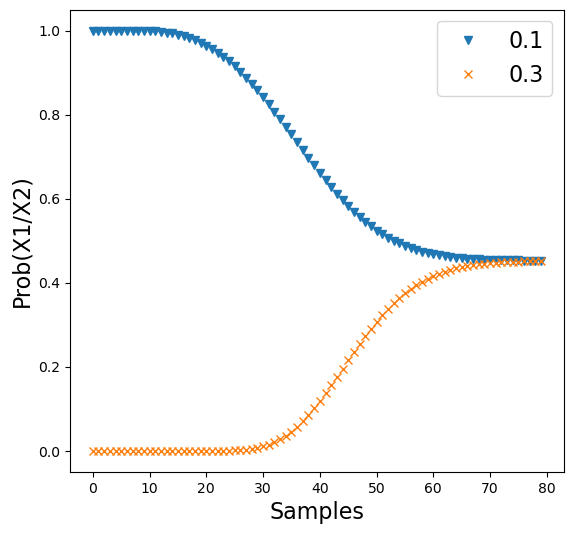

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(range(0, 80), upper_bound,'v',label='0.1')
plt.plot(range(0, 80),lower_bound,'x',label='0.3')
plt.xlabel("Samples", fontsize = 16)
plt.ylabel("Prob(X1/X2)", fontsize = 16)
plt.legend(fontsize=16);
print("P(x1>x2) [{},{}]".format(lower_bound[-1],upper_bound[-1]))

Around 65 the lines are pretty much the same.The probability that X1>X2 is lower than 0.5, Thus X2 is more likely to reach 15 defectives 'faster' then X1 reaching 5 defectives.

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In each scenario we created an array of 11 values and normalize them by the population of each town

First scenario:

In [10]:
sh_population = 16000
sh1 = np.array([4100,4200,4300,4400,4500,4600,7000,7300,7500,10200,11200]*int(sh_population/11))
sh_median1 = np.median(sh1)
sh_mean1 = np.mean(sh1)
Q3,Q1=np.percentile(sh1,(75,25))
sh_iqr1 = Q3-Q1
print("SH Median:{}, SH Mean:{}, SH IQR:{}".format(sh_median1,sh_mean1, sh_iqr1))

rg_population = 22000
rg1 = np.array([1000,1500,1800,3000,3500,4600,5000,5100,6200,6500,8000]*int(rg_population/11))
rg_median1 = np.median(rg1)
rg_mean1 = np.mean(rg1)
Q3,Q1=np.percentile(rg1,(75,25))
rg_iqr1 = Q3-Q1
print("RG Median:{}, RG Mean:{}, RG IQR:{}".format(rg_median1,rg_mean1, rg_iqr1))

SH Median:4600.0, SH Mean:6300.0, SH IQR:3200.0
RG Median:4600.0, RG Mean:4200.0, RG IQR:4400.0


Text(0.5, 1.0, 'Random Grove histogram scenario 1')

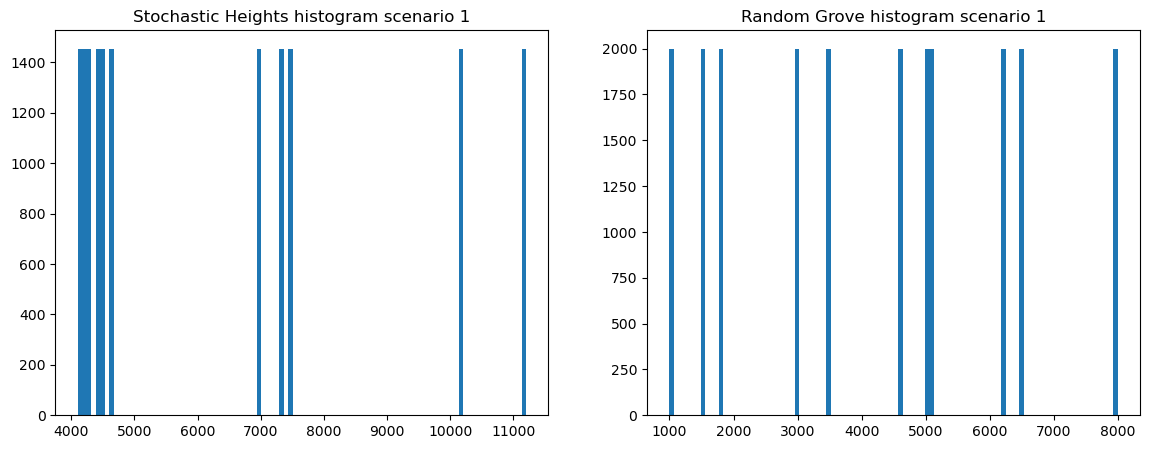

In [11]:
n_bins=100
fig, axes = plt.subplots(1, 2,figsize=(14,5))

axes[0].hist(sh1, bins=n_bins)
axes[0].set_title("Stochastic Heights histogram scenario 1")
axes[1].hist(rg1, bins=n_bins)
axes[1].set_title("Random Grove histogram scenario 1")

Second scenario:

In [12]:
sh_population = 16000
sh2 = np.array([3100,3400,3700,4000,4300,4600,7000,7500,8200,11500,12000]*int(sh_population/11))
sh_median2 = np.median(sh2)
sh_mean2 = np.mean(sh2)
Q3,Q1=np.percentile(sh2,(75,25))
sh_iqr2 = Q3-Q1
print("SH Median:{}, SH Mean:{}, SH IQR:{}".format(sh_median2,sh_mean2, sh_iqr2))

rg_population = 22000
rg2 = np.array([1000,1200,1400,2000,2200,4600,5000,5300,6000,8500,9000]*int(rg_population/11))
rg_median2 = np.median(rg2)
rg_mean2 = np.mean(rg2)
Q3,Q1=np.percentile(rg2,(75,25))
rg_iqr2 = Q3-Q1
print("RG Median:{}, RG Mean:{}, RG IQR:{}".format(rg_median2,rg_mean2, rg_iqr2))

SH Median:4600.0, SH Mean:6300.0, SH IQR:4500.0
RG Median:4600.0, RG Mean:4200.0, RG IQR:4600.0


Text(0.5, 1.0, 'Random Grove histogram scenario 2')

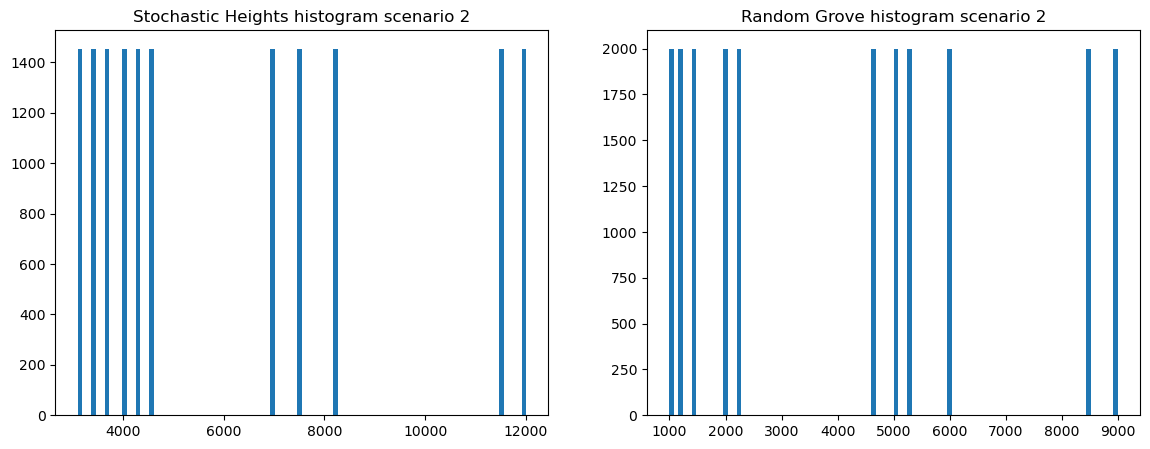

In [13]:
n_bins=100
fig, axes = plt.subplots(1, 2,figsize=(14,5))

axes[0].hist(sh2, bins=n_bins)
axes[0].set_title("Stochastic Heights histogram scenario 2")
axes[1].hist(rg2, bins=n_bins)
axes[1].set_title("Random Grove histogram scenario 2")

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

In [14]:
sh_population = 16000
sh3 = np.array([4000,4200,4300,4400,4500,4600,7200,7300,7400,10600,10800]*int(sh_population/11))
sh_median3 = np.median(sh3)
sh_mean3 = np.mean(sh3)
Q3,Q1=np.percentile(sh3,(75,25))
sh_iqr3 = Q3-Q1
sh_var3=np.var(sh3)
print("SH Median:{}, SH Mean:{}, SH IQR:{}, SH VAR:{}".format(sh_median3,sh_mean3,sh_iqr3,sh_var3))

rg_population = 22000
rg3 = np.array([2000,2300,2500,2600,4100,4600,5000,5200,5700,6000,6200]*int(rg_population/11))
rg_median3 = np.median(rg3)
rg_mean3 = np.mean(rg3)
Q3,Q1=np.percentile(rg3,(75,25))
rg_iqr3 = Q3-Q1
rg_var3=np.var(rg3)
print("RG Median:{}, RG Mean:{}, RG IQR:{}, RG VAR:{}".format(rg_median3,rg_mean3,rg_iqr3,rg_var3))

SH Median:4600.0, SH Mean:6300.0, SH IQR:3100.0, SH VAR:5927272.7272727275
RG Median:4600.0, RG Mean:4200.0, RG IQR:3200.0, RG VAR:2290909.090909091


Text(0.5, 1.0, 'Random Grove histogram scenario 3')

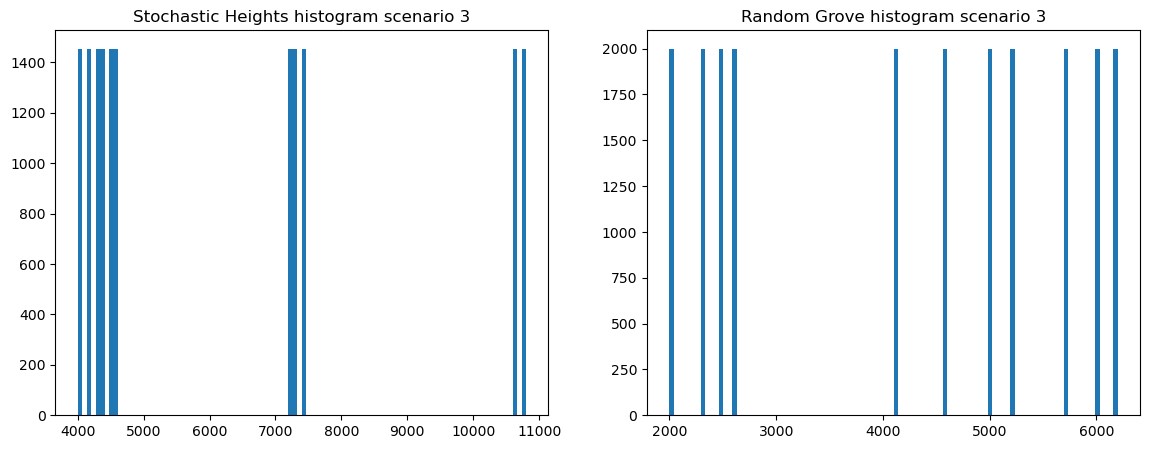

In [15]:
n_bins=100
fig, axes = plt.subplots(1, 2,figsize=(14,5))

axes[0].hist(sh3, bins=n_bins)
axes[0].set_title("Stochastic Heights histogram scenario 3")
axes[1].hist(rg3, bins=n_bins)
axes[1].set_title("Random Grove histogram scenario 3")

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [16]:
sh_population = 16000
sh3 = np.array([4000,4200,4300,4400,4500,4600,7200,7300,7400,10600,10800]*int(sh_population/11))
sh_phi = np.array([6222,7885,8766,9267,9307,12000,13545,14324,16572,19754,19858]*int(sh_population/11))

sh_phi_median = np.median(sh_phi)
sh_phi_mean = np.mean(sh_phi)
sh_cov_rent_phi=0.97*(np.var(sh3)**0.5)*(np.var(sh_phi)**0.5)
print("SH PHI Median:{}, SH PHI Mean:{}, SH cov(rent,phi):{}".format(sh_phi_median,sh_phi_mean,sh_cov_rent_phi))

rg_population = 22000
rg3 = np.array([2000,2300,2500,2600,4100,4600,5000,5200,5700,6000,6200]*int(rg_population/11))
rg_phi = np.array([5572,6462,6777,7115,7155,8000,8466,8495,10458,11888,13112]*int(rg_population/11))
rg_phi_median = np.median(rg_phi)
rg_phi_mean = np.mean(rg_phi)
rg_cov_rent_phi=0.89*(np.var(rg3)**0.5)*(np.var(rg_phi)**0.5)
print("RG PHI Median:{}, RG PHI Mean:{}, RG cov(rent,phi):{}".format(rg_phi_median,rg_phi_mean,rg_cov_rent_phi))

SH PHI Median:12000.0, SH PHI Mean:12500.0, SH cov(rent,phi):10640438.529357862
RG PHI Median:8000.0, RG PHI Mean:8500.0, RG cov(rent,phi):3046382.8849786604


The covariance is based the distributions and deviate up to 1% :

In [17]:
cov_sh = np.cov(sh3,sh_phi)[0,1]
cov_rg = np.cov(rg3,rg_phi)[0,1]

(cov_rg/rg_cov_rent_phi)-(cov_sh/sh_cov_rent_phi)

0.013179404502486225

#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

SH Heatmap:

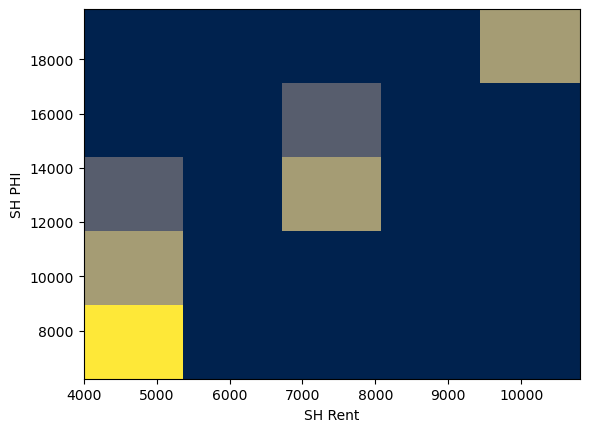

In [19]:
plt.hist2d(x=sh3,y=sh_phi,cmap='cividis',bins=5)
plt.xlabel('SH Rent')
plt.ylabel('SH PHI')
plt.show()

RG Heatmap:

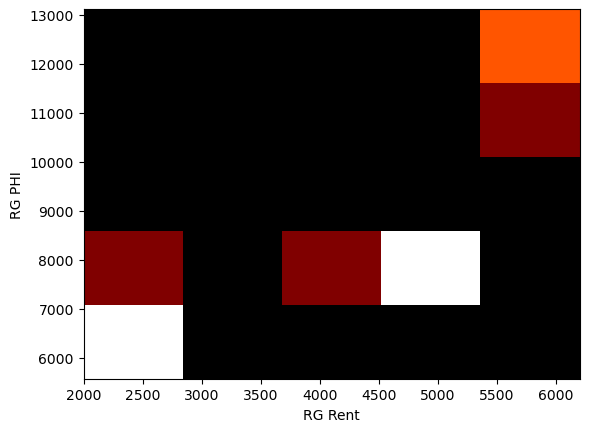

In [20]:
plt.hist2d(x=rg3,y=rg_phi,cmap='gist_heat',bins=5)
plt.xlabel('RG Rent')
plt.ylabel('RG PHI')
plt.show()

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [21]:
## First we generated the experiments using random multinomial
exp_100 = np.random.multinomial(20, np.array([0.2,0.1,0.1,0.1,0.2,0.3]), 100)
## We make Y a list of summing up the second, third and forth columns in our array (X2 + X3 + X4)
y_lst = []
for i in exp_100:
    clear_output(wait=True)
    y = i[1] + i[2] + i[3]
    y_lst.append(y)

## Here we calculated the third moment of Y and compering it to the formula of the third binomial moment we saw at class
Emp = moment(y_lst, moment = 3)
Bin = 20*0.3*(1-0.3)*(1-0.6)

print("Empirical Multinomial:{}\nBinomial Multinomial:{}".format(Emp,Bin))

Empirical Multinomial:1.7280000000000024
Binomial Multinomial:1.6799999999999997


There is a difference between the two results. one is the theoretical centralized third moment of the distribution and the other one is the empirical centralized third moment which is based on a sample and computed as follows:

$ m_{3}=\frac{1}{n}\sum_{i=1}^{n}(x_{i}-\overline{x})^{3} $

The mean is based on the sample data and is different than the theoretical one.
As we increase the number of experiments to a larger number the two values will converge.


### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

**The variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables:**

By using the following: $$ Var(X+Y) = Var(X) + Var(Y) + 2Cov(X,Y) $$
\begin{align}
        Var(X+Y+Z) &= Var(X) + Var(Y+Z) + 2Cov(X,Y+Z) \\
        &= Var(X) + Var(Y) + Var(Z) + 2Cov(Y,Z) + 2Cov(X,Y+Z) \\[1em]
    \end{align}


We know that for two jointly distributed real-valued random variables, by using the linearity property of expectations the covariance is defined as the expected value of their product minus the product of their expected values: 

$$Cov(X,Y) = E(XY) - E(X)E(Y)$$

We'll calculate: 
$$Cov(X,Y+Z)$$ 

\begin{align}
        Cov(X,Y+Z) &= E(X(Y+Z)) - E(X)E(Y+Z) \\
        &= E(XY+XZ) - E(X)E(Y+Z)\\
        \text{By linearity of Expectations: } \\
        &= E(XY) + E(XZ) - E(X)(E(Y) + E(Z)) \\
        &= [E(XY) - E(X)E(Y)] + [E(XZ) - E(X)E(Z)] \\
        &= Cov(X,Y) + Cov(X,Z)
    \end{align}
    
Hence we get:
$$Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z) + 2[Cov(X,Y) + Cov(X,Z) + Cov(Y,Z)]$$ <br/>

**When X,Y,Z are pairwise independent**

If X,Y,Z are pairwise independent it means the covariance between each random variable will be 0. <br/>
Hence: $$ Var(X+Y+Z) = Var(X) + Var(Y) + Var(Z)$$ <br/>

**When X,Y,Z are pairwise independent, are they necessarily collectively independent?**

We will counterexample to show that the above does not hold:<br/><br/>

Suppose $X,Y$ are two independent tosses of a fair coin, designating 1 for heads and 0 for tail. Let the third random variable $Z$ be the sum modulo 2 of the others.<br/>

$X,Y,Z$ has the following probability distribution:<br/>

$$
(X,Y,Z) =\left\{
    \begin{array}\\
        (0,0,0) & \mbox{with probability 1/4,} \\
        (0,1,1) & \mbox{with probability 1/4,} \\
        (1,0,1) & \mbox{with probability 1/4,} \\
        (1,1,0) & \mbox{with probability 1/4.}
    \end{array}
\right.
$$
<br/>
The margnial probability distributions are identical:<br/>

$$
P_X(0)=P_Y(0)=P_Z(0)=1/2 \\
P_X(1)=P_Y(1)=P_Z(1)=1/2
$$

Looking at the bivariate distributions we also get:<br/>

$$P_{X,Y}=P_{X,Z}=P_{Y,Z}$$

Where $$P_{X,Y}(0,0)=P_{X,Y}(0,1)=P_{X,Y}(1,0)=P_{X,Y}(1,1)=1/4$$<br/>

Since each of the pairwise joint distributions equals the product of their respective marginal distributions, the variabls are pairwise independent.<br/>

However, $X,Y,Z$ are **not** collectively independent, since:
$$P_{X,Y,Z} \ne P_X(x)P_Y(y)P_Z(z)$$<br/>

For example,
$$P_{X,Y,Z}(0,0,0)=1/4 \ne 1/8=P_X(0)P_Y(0)P_Z(0)$$

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [22]:
def Conv(x1, x2):
    q =[]
    minV = x1.support()[0] + x2.support()[0]
    maxV = x1.support()[1] + x2.support()[1]
    for i in range(minV, maxV+1):
        sump = 0
        for j in range(i):
            sump += (x1.pmf(j)*x2.pmf(i-j))
        q.append(sump)
    return rv_discrete(values=(range(minV,maxV+1),q))

In [23]:
def NFoldConv(P , n):
    if n == 0:
        return []
    if n == 1:
        return P
    Q = NFoldConv(P,n-1)
    Q = Conv(Q,P)
    return Q

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [33]:
P = rv_discrete(values=([1,2,3,4,5,6,7,8],[1/8]*8))
Q = NFoldConv(P, 17)
print("Sum of results: {}".format(Q.xk))
print(" ")
print("Distribution of each result: {}".format(Q.pk))

Sum of results: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136]
 
Distribution of each result: [4.44089210e-16 7.54951657e-15 6.79456491e-14 4.30322444e-13
 2.15161222e-12 9.03677133e-12 3.31348282e-11 1.08871578e-10
 3.26607186e-10 9.07134812e-10 2.35772912e-09 5.78267301e-09
 1.34733957e-08 2.99840073e-08 6.40173488e-08 1.31615841e-07
 2.61380925e-07 5.02742224e-07 9.38663699e-07 1.70459936e-06
 3.01597023e-06 5.20688185e-06 8.78316811e-06 1.44930374e-05
 2.34184931e-05 3.70901651e-05 5.76270894e-05 8.79011761e-05
 1.31723541e-04 1.94046516e-04 2.81171

### Question 6 - Counting Similar Strings

Define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly tossing a $p$-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C = C_{p, n}$ be defined by:
$$C(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 6.A
Plot the distribution of $W$ for $n = 100$ and $p = 0.3$. What is the name of this distribution?

**We know that $\omega$ is an event in the probability space of $\Omega$
We also know that W($\omega$) is the sumation of 1 in any event and C is the amount of events that I receive for each sumation option**

**In order to get the distribution of W which is distributed binomial, we ran 100K iterations:**

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

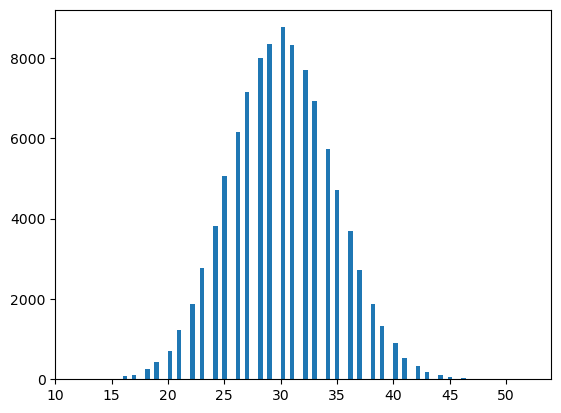

In [24]:
binom_result = []

for i in range(100000):
    binom_result.append(np.random.binomial(100,0.3))
    
binomial_distribution = np.array(binom_result)

plt.hist(binomial_distribution,bins=100)
plt.plot

#### 6.B
State a formula for comuting $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

**We will define $W(\omega)$ = k and $C(\omega)$ = $n \choose i$**

**where $n \choose i$ = $\frac{n!}{i!(n-i)!}$**

**The expected value of C - the amount of events that we receive for each sumation option is calculated as following:**

$E(c)$ = $\sum \limits _{i=0} ^{n}$ $n \choose i$ P($W(\omega$=k)) \
$E(c)$ = $\sum \limits _{i=0} ^{n}$ $n \choose i$ $n \choose i$ $p^i * (1-p)^{n-i}$ \
$E(c) = \sum \limits _{i=0} ^{n} p^i * (1-p)^{n-i} (\frac{n!}{i!(n-i)!})^2$ 

In [26]:
def ExpectedValue(n,p):
    EV=0
    for i in range(0,n+1):
        EV+= (pow(p,i))*(pow(1-p,n-i))*(pow((np.math.factorial(n))/(np.math.factorial(i)*np.math.factorial(n-i)),2))
    return EV

**Computed E(C):**

In [27]:
n = [10, 20, 50, 100]
p = [0.1, 0.5, 0.8]

evc_stored_data = []

for i in n:
    for j in p:
        result = round(ExpectedValue(i,j),2)
        print(f"The E(c) for n = {i} and p = {j} is {result}")
        evc_stored_data.append(result)

The E(c) for n = 10 and p = 0.1 is 22.58
The E(c) for n = 10 and p = 0.5 is 180.43
The E(c) for n = 10 and p = 0.8 is 66.95
The E(c) for n = 20 and p = 0.1 is 1757.75
The E(c) for n = 20 and p = 0.5 is 131460.69
The E(c) for n = 20 and p = 0.8 is 16979.43
The E(c) for n = 50 and p = 0.1 is 1479309659.77
The E(c) for n = 50 and p = 0.5 is 89609514959900.03
The E(c) for n = 50 and p = 0.8 is 490151964857.8
The E(c) for n = 100 and p = 0.1 is 1.6815694309212346e+19
The E(c) for n = 100 and p = 0.5 is 7.143018323803167e+28
The E(c) for n = 100 and p = 0.8 is 2.013008191527898e+24


#### 6.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. <br>
Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). <br>
In every histogram indicate the values of $n$ and $p$. 

In [28]:
def c_values(n,p):
    c_results = []
    for sample in range(1000):
        i = np.random.binomial(n,p)
        c_results.append((np.math.factorial(n))/(np.math.factorial(i)*np.math.factorial(n-i)))
    return c_results

In [29]:
emp_mean_list = []

def plot_hist(axis,n,p, evc):
    # creating plot data
    c_plot = c_values(n,p)
    axis.hist(c_plot, bins=[(np.math.factorial(n))/(np.math.factorial(i)*np.math.factorial(n-i)) for i in range(int(n/2))])
    # saving empirical AVG of C's
    emp_mean = np.mean(c_plot)
    emp_mean_list.append(emp_mean)
    # plot ind
    axis.set_title(f'empirical AVG = {emp_mean},\n E(C) = {evc},\n n = {n}, p = {p}')
    axis.set_xscale('log')
    axis.set_xlabel(f'log of C')
    axis.set_ylabel(f'count')

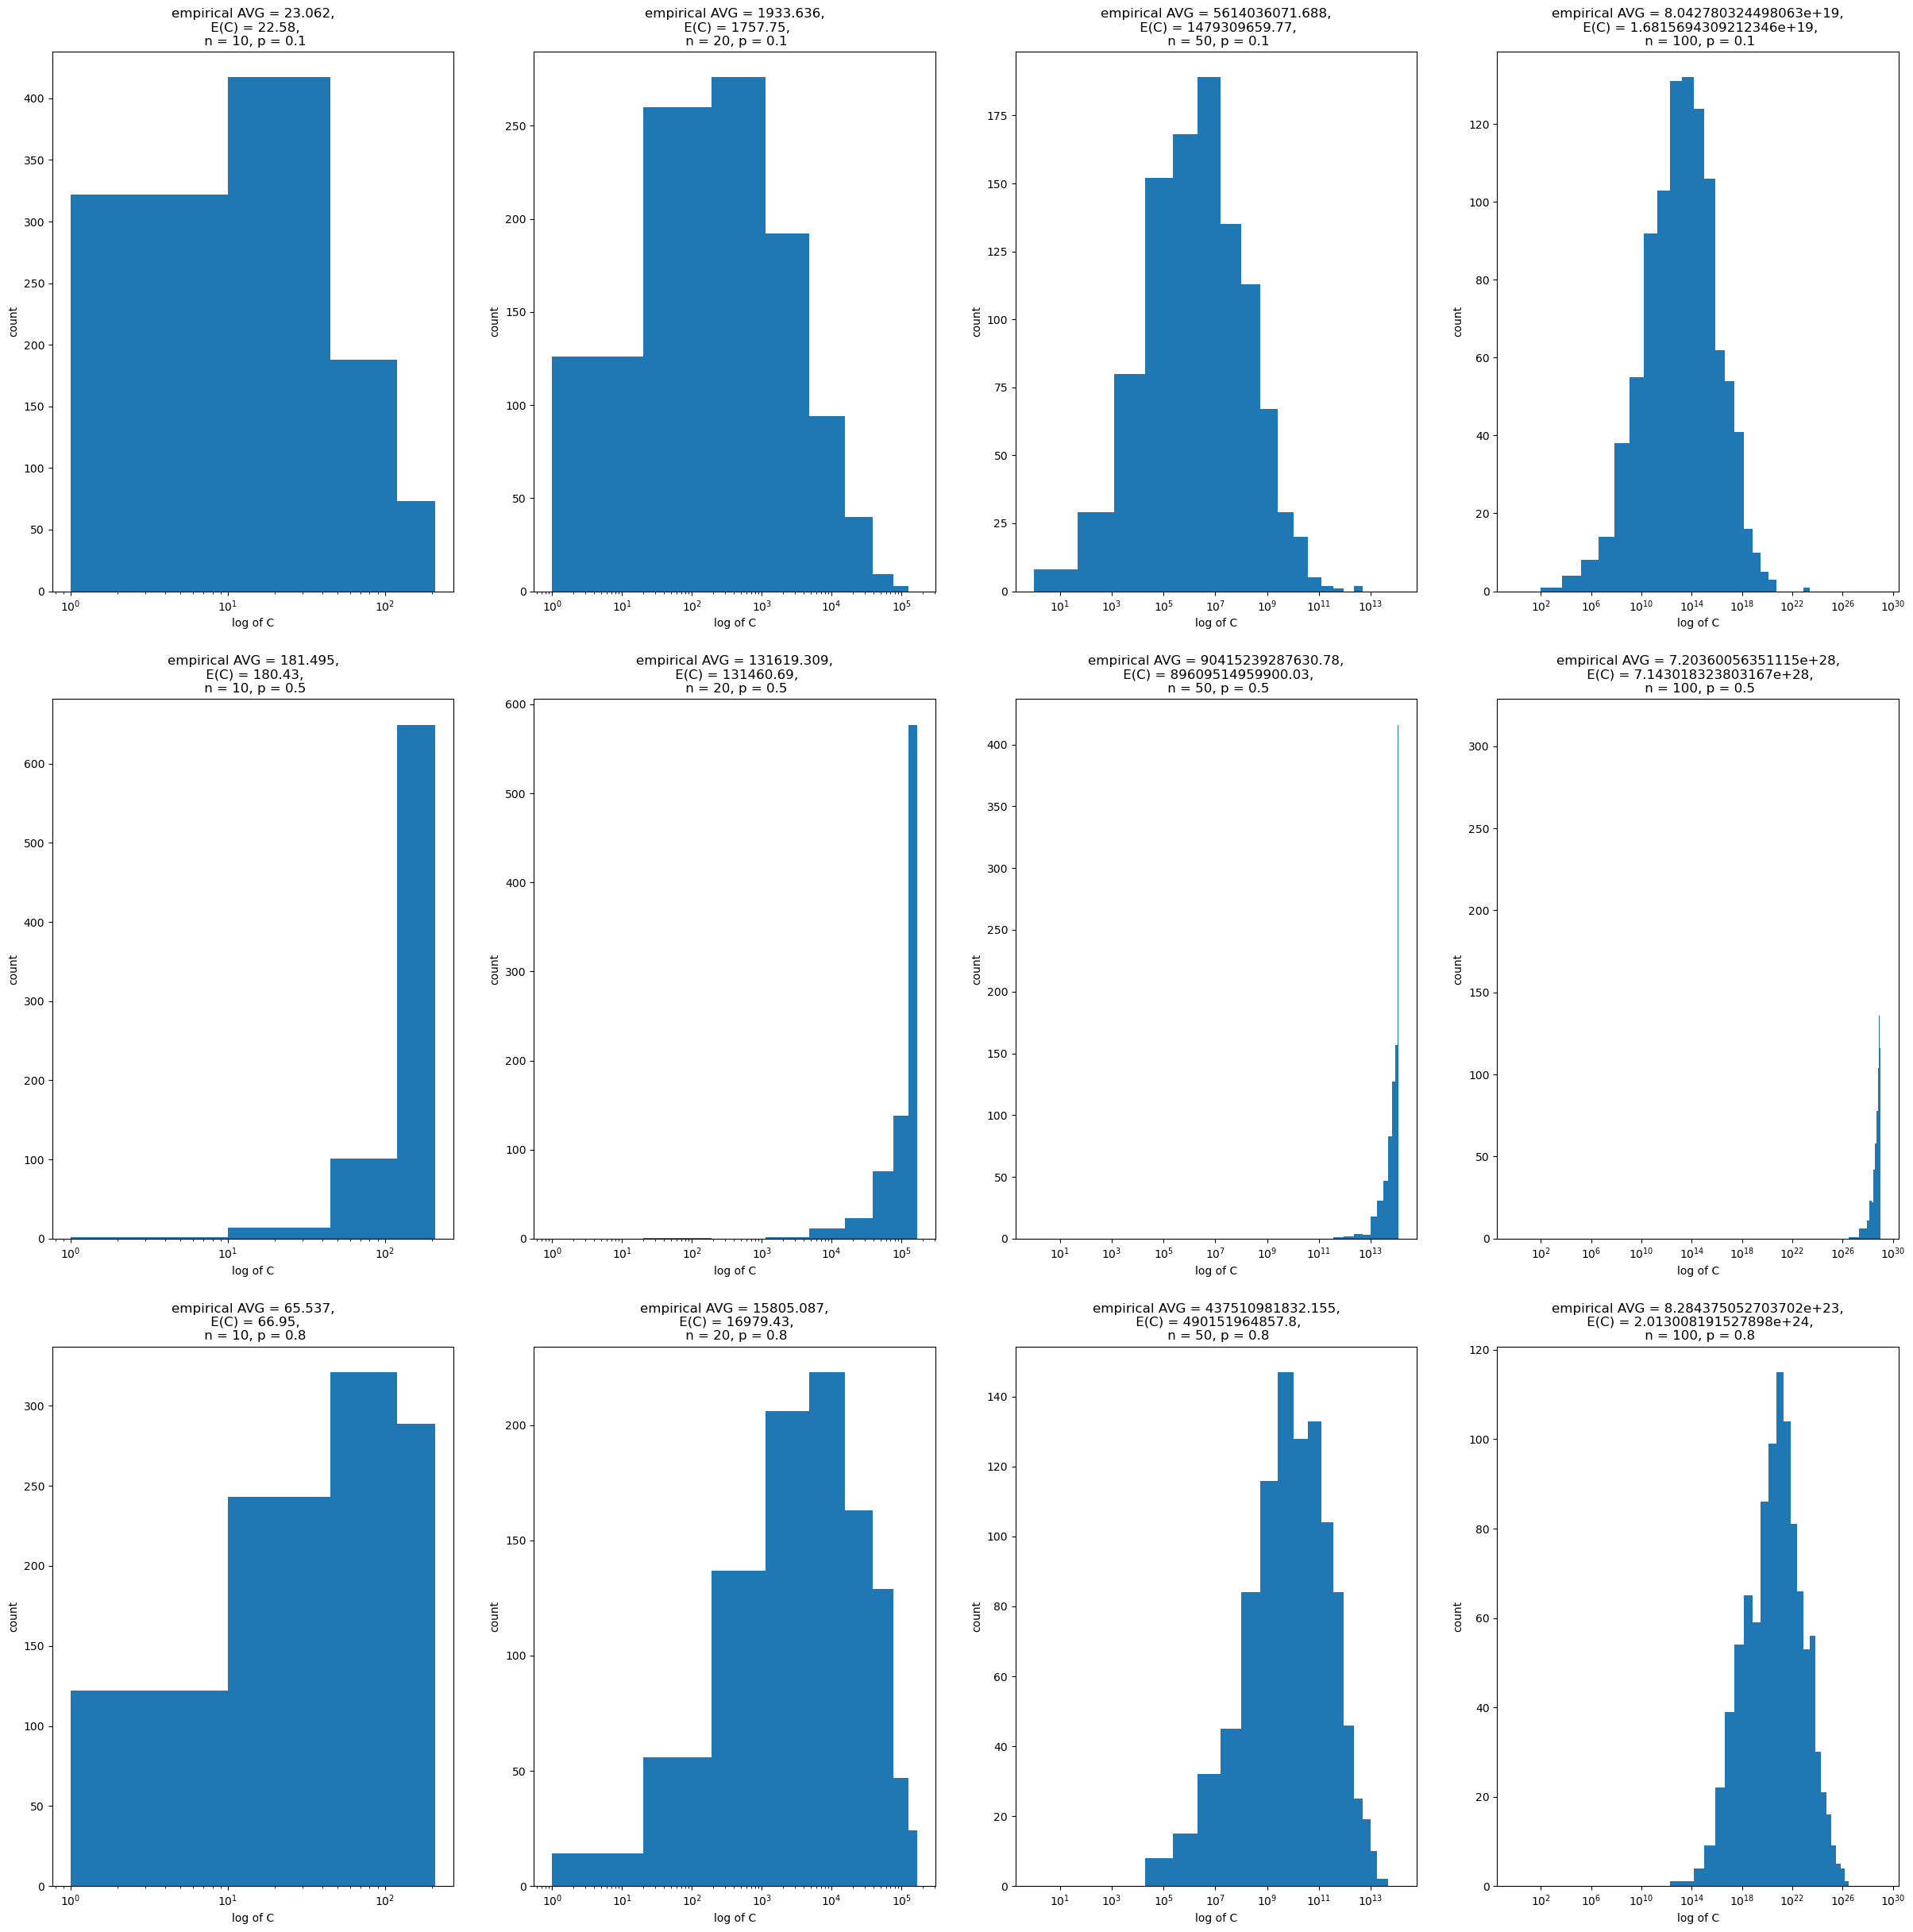

In [30]:
fig, axis = plt.subplots(3, 4, figsize=(30,30))

plot_hist(axis[0,0],10,0.1, evc_stored_data[0])
plot_hist(axis[1,0],10,0.5, evc_stored_data[1])
plot_hist(axis[2,0],10,0.8, evc_stored_data[2])
plot_hist(axis[0,1],20,0.1, evc_stored_data[3])
plot_hist(axis[1,1],20,0.5, evc_stored_data[4])
plot_hist(axis[2,1],20,0.8, evc_stored_data[5])
plot_hist(axis[0,2],50,0.1, evc_stored_data[6])
plot_hist(axis[1,2],50,0.5, evc_stored_data[7])
plot_hist(axis[2,2],50,0.8, evc_stored_data[8])
plot_hist(axis[0,3],100,0.1, evc_stored_data[9])
plot_hist(axis[1,3],100,0.5, evc_stored_data[10])
plot_hist(axis[2,3],100,0.8, evc_stored_data[11])


plt.show()

#### 6.D
Use a scatter plot to compare the empirical and the computed values from the previous section

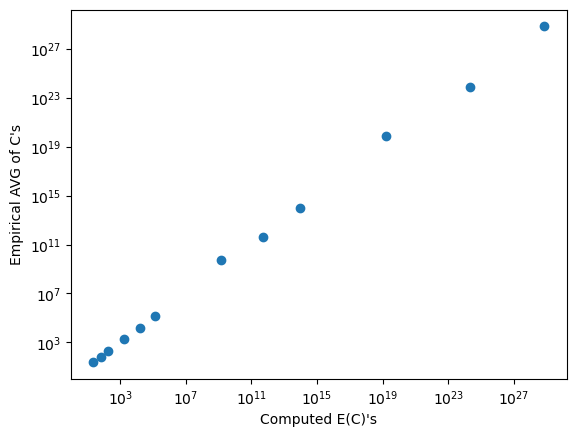

In [31]:
plt.scatter(x=evc_stored_data,y=emp_mean_list)
plt.xlabel("Computed E(C)'s")
plt.ylabel("Empirical AVG of C's")
plt.xscale('log')
plt.yscale('log')
plt.show()